In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

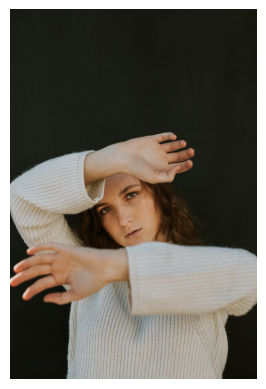

In [2]:
img = Image.open('./image.jpg')
# plot original image
plt.imshow(img)
plt.axis('off')
plt.show()

I0000 00:00:1730816910.192110  917370 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730816910.214261  917432 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.01), renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730816910.235885  917435 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730816910.250251  917448 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730816910.284574  917446 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


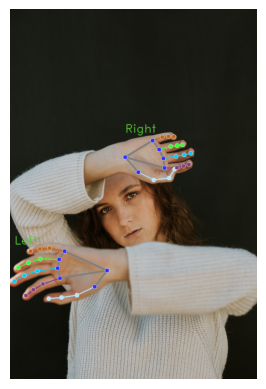

In [3]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

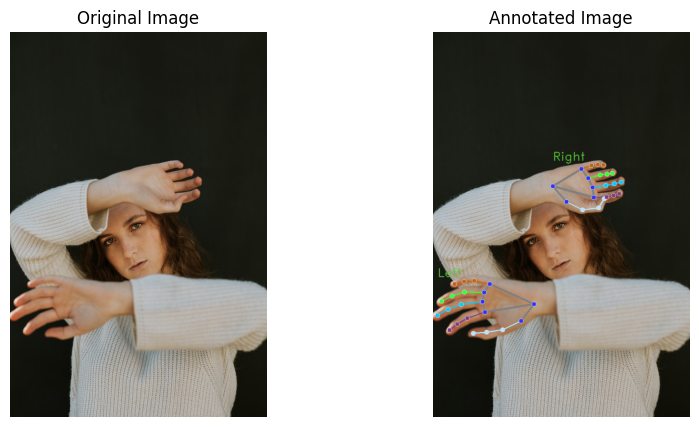

In [4]:
# compare the two images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(annotated_image)
ax[1].axis('off')
ax[1].set_title('Annotated Image')

plt.show()

Detection result for image 0: HandLandmarkerResult(handedness=[[Category(index=1, score=0.9969716668128967, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.3700081706047058, y=0.7494823932647705, z=-1.94533299691102e-06, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.31351983547210693, y=0.562736988067627, z=-0.08417922258377075, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3177824020385742, y=0.32140079140663147, z=-0.1421222686767578, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.42151176929473877, y=0.1649053990840912, z=-0.20372304320335388, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5688924193382263, y=0.18833546340465546, z=-0.2449314147233963, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.550865888595581, y=0.30206888914108276, z=-0.019473720341920853, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5953564643859863, y=0.166032075881958, z=-0.14502666890621185, visibility=0.0, presence=0.0), N

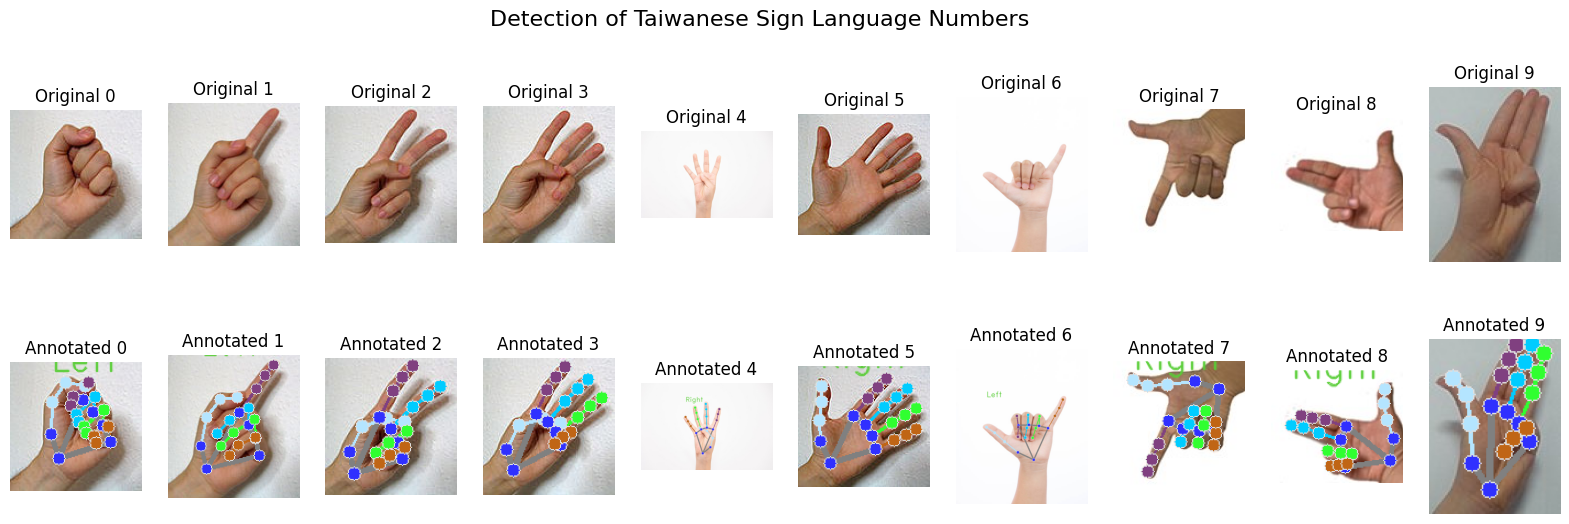

In [21]:
# detect the number of hands (Taiwanese Sign Language)
dir = "./chinese_number_gestures/" # 0 ~ 9

fig, ax = plt.subplots(2, 10, figsize=(20, 6))

fig.suptitle('Detection of Taiwanese Sign Language Numbers', fontsize=16)

for i in range(10):
    img = Image.open(dir + str(i) + ".png")
    ax[0, i].imshow(img)
    ax[0, i].axis('off')
    ax[0, i].set_title(f'Original {i}')

    image = mp.Image.create_from_file(dir + str(i) + ".png")
    detection_result = detector.detect(image)
    
    # Debug print to check detection result
    print(f"Detection result for image {i}: {detection_result}")
    
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    ax[1, i].imshow(annotated_image)
    ax[1, i].axis('off')
    ax[1, i].set_title(f'Annotated {i}')

plt.show()